In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Pre-processing of data 

In [2]:
df1 = pd.read_csv('Final_data.csv')
df2 = pd.read_csv('Data_printed.csv')
df3 = pd.read_csv('Data_HP_IPL.csv')

In [3]:
wavelength = np.linspace(380, 780, 401)

w1 = df1['Epson Projector Blue: Wavelength (nm)']
w2 = df2['Canon Blue: Wavelength (nm)']
w3 = df3['HP IPL Black: Wavelength (nm)']

In [4]:
df1 = df1[df1.columns[1::2]]
df2 = df2[df2.columns[1::2]]
df3 = df3[df3.columns[1::2]]

In [5]:
final_data = pd.DataFrame()
final_data['wavelength'] = wavelength

In [6]:
for i in df1.columns.tolist(): final_data[i[:-17]] = np.interp(final_data['wavelength'], w1, df1[i])
for j in df2.columns.tolist(): final_data[j[:-17]] = np.interp(final_data['wavelength'], w2, df2[j])
for k in df3.columns.tolist(): final_data[k[:-17]] = np.interp(final_data['wavelength'], w3, df3[k])

In [7]:
final_data.to_csv('processed_data.csv', index = None, header=True)

### Final data

In [8]:
final_data.head()

wavelength  Epson Projector direct Blue  Samantha iPhone Red  \
0       380.0                     0.018633             0.015271   
1       381.0                     0.018488             0.015220   
2       382.0                     0.018706             0.015486   
3       383.0                     0.018065             0.015327   
4       384.0                     0.017874             0.015551   

   Samantha iPhone Blue  Samantha iPhone Green  Jose Samsung Galaxy J7 Red  \
0              0.016711               0.015446                    0.014793   
1              0.016805               0.015403                    0.014992   
2              0.016390               0.015445                    0.015201   
3              0.016560               0.014819                    0.015650   
4              0.016260               0.014674                    0.016042   

   Jose Samsung Galaxy J7 Green  Jose Samsung Galaxy J7 Blue  \
0                      0.016009                     0.015432   
1                      0.015652                     0.015679   
2                      0.015499                     0.015737   
3                      0.015799                     0.016106   
4                      0.015780                     0.016064   

   Rene Lenovo Laptop Red  Rene Lenovo Laptop Green  ...  HP IPL Black  \
0                0.015171                  0.015484  ...      0.015737   
1                0.015236                  0.015345  ...      0.015653   
2                0.015446                  0.015290  ...      0.015453   
3                0.015587                  0.015065  ...      0.015438   
4                0.015718                  0.015009  ...      0.015386   

   HP IPL Red  HP IPL Green  HP IPL Blue  HP IPL Cyan  HP IPL Magenta  \
0    0.018118      0.017082     0.017817     0.019798        0.018709   
1    0.018031      0.016914     0.017690     0.019643        0.018589   
2    0.017966      0.016957     0.017366     0.019816        0.018103   
3    0.017871      0.017186     0.017438     0.019814        0.018155   
4    0.017805      0.017671     0.017645     0.020154        0.018226   

   HP IPL Yellow  HP IPL Brown  HP IPL Orange  HP IPL Purple  
0       0.017921      0.017553       0.016774       0.018686  
1       0.017972      0.017459       0.016861       0.018528  
2       0.018342      0.017370       0.016957       0.017850  
3       0.018337      0.017286       0.017159       0.017708  
4       0.017922      0.017500       0.017046       0.017958  

[5 rows x 101 columns]

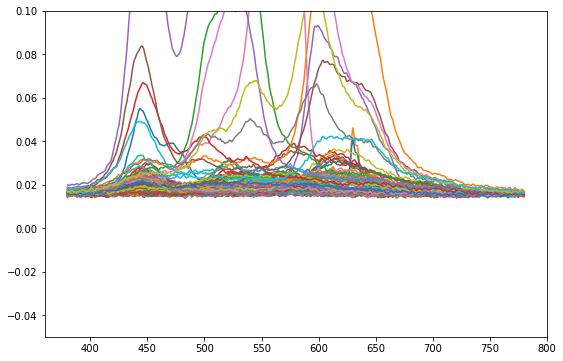

In [9]:
plt.figure(figsize=(9,6))
for i in final_data.columns[1:]:
    plt.plot(final_data['wavelength'], final_data[i])

plt.ylim(-0.05,0.1)
plt.show()

In [10]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [11]:
final_data_mono = pd.DataFrame()
final_data_mono['wavelength'] = wavelength

for name in final_data.columns[1:]:
    final_data_mono[name] = (final_data[name] - final_data[name].min()) / (final_data[name].max() - final_data[name].min())
    
final_data_mono.head()

wavelength  Epson Projector direct Blue  Samantha iPhone Red  \
0       380.0                     0.102828             0.019678   
1       381.0                     0.099228             0.018062   
2       382.0                     0.104630             0.026501   
3       383.0                     0.088757             0.021456   
4       384.0                     0.084020             0.028559   

   Samantha iPhone Blue  Samantha iPhone Green  Jose Samsung Galaxy J7 Red  \
0              0.182815               0.110229                    0.039792   
1              0.190337               0.106129                    0.059560   
2              0.157184               0.110092                    0.080256   
3              0.170769               0.051293                    0.124655   
4              0.146797               0.037659                    0.163477   

   Jose Samsung Galaxy J7 Green  Jose Samsung Galaxy J7 Blue  \
0                      0.106026                     0.105280   
1                      0.073063                     0.123731   
2                      0.058900                     0.128105   
3                      0.086657                     0.155617   
4                      0.084846                     0.152531   

   Rene Lenovo Laptop Red  Rene Lenovo Laptop Green  ...  HP IPL Black  \
0                0.085505                  0.153702  ...      0.150294   
1                0.094005                  0.137072  ...      0.137434   
2                0.121550                  0.130480  ...      0.106615   
3                0.140036                  0.103571  ...      0.104358   
4                0.157120                  0.096853  ...      0.096393   

   HP IPL Red  HP IPL Green  HP IPL Blue  HP IPL Cyan  HP IPL Magenta  \
0    0.011066      0.015157     0.050643     0.028519        0.045114   
1    0.010331      0.013772     0.048181     0.027424        0.043354   
2    0.009774      0.014132     0.041920     0.028651        0.036227   
3    0.008976      0.016011     0.043310     0.028631        0.036994   
4    0.008417      0.020000     0.047326     0.031039        0.038036   

   HP IPL Yellow  HP IPL Brown  HP IPL Orange  HP IPL Purple  
0       0.008737      0.039224       0.006754       0.071098  
1       0.008991      0.037373       0.007659       0.066264  
2       0.010850      0.035623       0.008669       0.045560  
3       0.010823      0.033962       0.010774       0.041234  
4       0.008738      0.038183       0.009590       0.048864  

[5 rows x 101 columns]

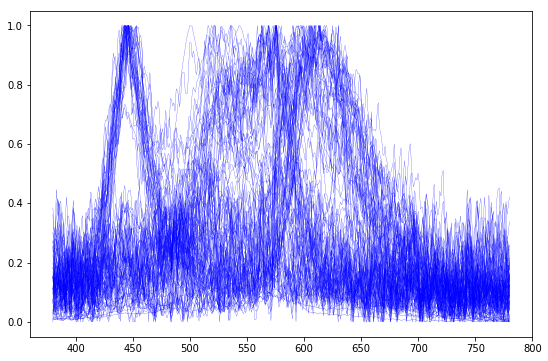

In [12]:
plt.figure(figsize=(9,6))
for i in final_data.columns[1:]:
    plt.plot(final_data_mono['wavelength'], final_data_mono[i], color='blue', lw = 0.2)
plt.show()

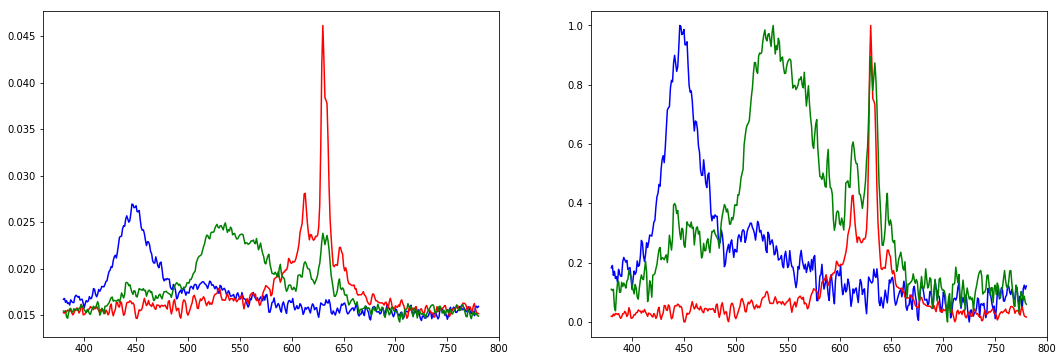

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(final_data['wavelength'], final_data['Samantha iPhone Blue'], color='blue')
plt.plot(final_data['wavelength'], final_data['Samantha iPhone Red'], color='red')
plt.plot(final_data['wavelength'], final_data['Samantha iPhone Green'], color='green')
plt.subplot(122)
plt.plot(final_data['wavelength'], final_data_mono['Samantha iPhone Blue'], color='blue')
plt.plot(final_data['wavelength'], final_data_mono['Samantha iPhone Red'], color='red')
plt.plot(final_data['wavelength'], final_data_mono['Samantha iPhone Green'], color='green')
plt.show()


In [14]:
df = pd.read_csv('CIE_1964.csv')
df.columns = ['wavelength (nm)','x_bar10','y_bar10','z_bar10']
df.drop(df.tail(1).index,inplace=True)

In [15]:
cie_xy = pd.DataFrame()

cie_xy['wavelength'] = wavelength
cie_xy['x_bar10'] = np.interp(cie_xy['wavelength'], df['wavelength (nm)'], df['x_bar10'])
cie_xy['y_bar10'] = np.interp(cie_xy['wavelength'], df['wavelength (nm)'], df['y_bar10'])
cie_xy['z_bar10'] = np.interp(cie_xy['wavelength'], df['wavelength (nm)'], df['z_bar10'])

In [16]:
def tristimulus(data, name, cie_xy):
    X = np.sum(data[name] * cie_xy['x_bar10'])
    Y = np.sum(data[name] * cie_xy['y_bar10'])
    Z = np.sum(data[name] * cie_xy['z_bar10'])
    
    
    x = X / (X + Y + Z)
    y = Y / (X + Y + Z)
    z = Z / (X + Y + Z)
    return x, y, z

In [17]:
#data_red = final_data.filter(regex='Red')
#data_green = final_data.filter(regex='Green')
#data_blue = final_data.filter(regex='Blue')

data_red = final_data_mono.filter(regex='Red')
data_green = final_data_mono.filter(regex='Green')
data_blue = final_data_mono.filter(regex='Blue')

In [18]:
names = [i[:-4] for i in data_red.columns.tolist()]
names[8] = names[8][:-1]

In [19]:
data_red.columns = names
data_green.columns = names
data_blue.columns = names

In [20]:
xyz_coor_red = []
xyz_coor_green = []
xyz_coor_blue = []
for name in names:
    xr,yr,zr = tristimulus(data_red, name, cie_xy)
    xg,yg,zg = tristimulus(data_green, name, cie_xy)
    xb,yb,zb = tristimulus(data_blue, name, cie_xy)
    xyz_coor_red.append((name, xr, yr, zr))
    xyz_coor_green.append((name, xg, yg, zg))
    xyz_coor_blue.append((name, xb, yb, zb))

In [21]:
data = pd.DataFrame()
data['Name'] = [i[0] for i in xyz_coor_red]
data['x_red'] = [i[1] for i in xyz_coor_red]
data['y_red'] = [i[2] for i in xyz_coor_red]
data['z_red'] = [i[3] for i in xyz_coor_red]

data['x_green'] = [i[1] for i in xyz_coor_green]
data['y_green'] = [i[2] for i in xyz_coor_green]
data['z_green'] = [i[3] for i in xyz_coor_green]

data['x_blue'] = [i[1] for i in xyz_coor_blue]
data['y_blue'] = [i[2] for i in xyz_coor_blue]
data['z_blue'] = [i[3] for i in xyz_coor_blue]

In [44]:
data.to_csv('xyz_vals.csv', index = None, header=True)

In [23]:
data.head()

Name     x_red     y_red     z_red   x_green   y_green  \
0          Samantha iPhone  0.520133  0.361186  0.118681  0.359789  0.444557   
1   Jose Samsung Galaxy J7  0.515426  0.352520  0.132054  0.352975  0.494671   
2       Rene Lenovo Laptop  0.508770  0.356950  0.134279  0.373103  0.449069   
3  Reinier Samsung J7 2016  0.577331  0.354824  0.067845  0.316143  0.515216   
4      Yka Samsung A7 2018  0.562790  0.357548  0.079662  0.318355  0.536142   

    z_green    x_blue    y_blue    z_blue  
0  0.195654  0.198143  0.158465  0.643392  
1  0.152354  0.216232  0.206229  0.577539  
2  0.177828  0.213123  0.169034  0.617843  
3  0.168641  0.222053  0.248160  0.529787  
4  0.145504  0.214464  0.170336  0.615200

In [24]:
import math
def area(a, b, c):
    def distance(p1, p2):
        return math.hypot(p1[0]-p2[0], p1[1]-p2[1])

    side_a = distance(a, b)
    side_b = distance(b, c)
    side_c = distance(c, a)
    s = 0.5 * ( side_a + side_b + side_c)
    return math.sqrt(s * (s - side_a) * (s - side_b) * (s - side_c))

In [25]:
for i in range(29):
    area_triangle = area((data.loc[i]['x_red'], data.loc[i]['y_red']), 
                    (data.loc[i]['x_green'], data.loc[i]['y_green']), 
                    (data.loc[i]['x_blue'], data.loc[i]['y_blue']))
    area_triangle = round(area_triangle, 6)
    data.at[i,'area'] = area_triangle

In [26]:
data.head()

Name     x_red     y_red     z_red   x_green   y_green  \
0          Samantha iPhone  0.520133  0.361186  0.118681  0.359789  0.444557   
1   Jose Samsung Galaxy J7  0.515426  0.352520  0.132054  0.352975  0.494671   
2       Rene Lenovo Laptop  0.508770  0.356950  0.134279  0.373103  0.449069   
3  Reinier Samsung J7 2016  0.577331  0.354824  0.067845  0.316143  0.515216   
4      Yka Samsung A7 2018  0.562790  0.357548  0.079662  0.318355  0.536142   

    z_green    x_blue    y_blue    z_blue      area  
0  0.195654  0.198143  0.158465  0.643392  0.029675  
1  0.152354  0.216232  0.206229  0.577539  0.033148  
2  0.177828  0.213123  0.169034  0.617843  0.026364  
3  0.168641  0.222053  0.248160  0.529787  0.042422  
4  0.145504  0.214464  0.170336  0.615200  0.053985

### Data Visualization

(0, 0.9)

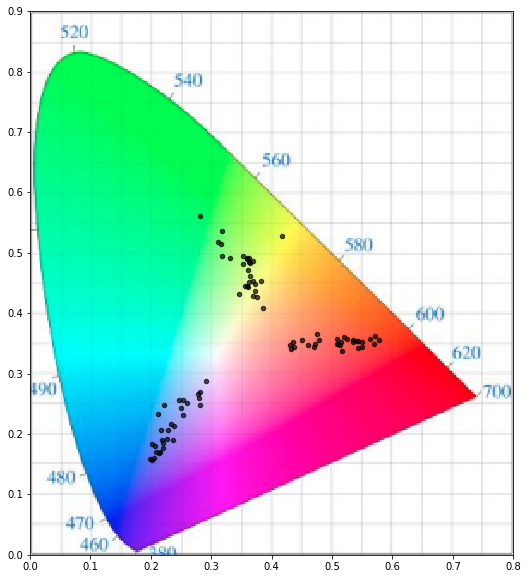

In [27]:
plt.figure(figsize=[10,10])

plt.scatter(data['x_red'], data['y_red'], s = 20, alpha = 0.7, color='black')
plt.scatter(data['x_green'], data['y_green'], s = 20, alpha = 0.7, color='black')
plt.scatter(data['x_blue'], data['y_blue'], s = 20, alpha = 0.7, color='black')

ciexy = plt.imread('color-tongue.png')
plt.imshow(ciexy, extent=(0.0, 0.8, 0.0, 0.9))
plt.xlim(0,0.8)
plt.ylim(0,0.9)

In [28]:
area((0.64, 0.33), (0.3, 0.6), (0.15, 0.06))

0.11205000000000001

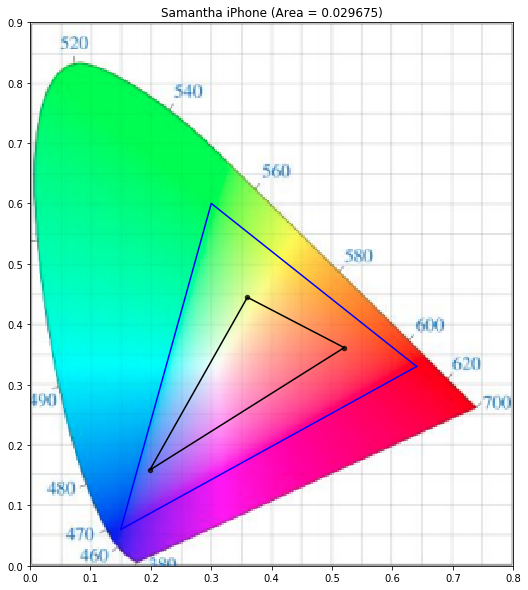

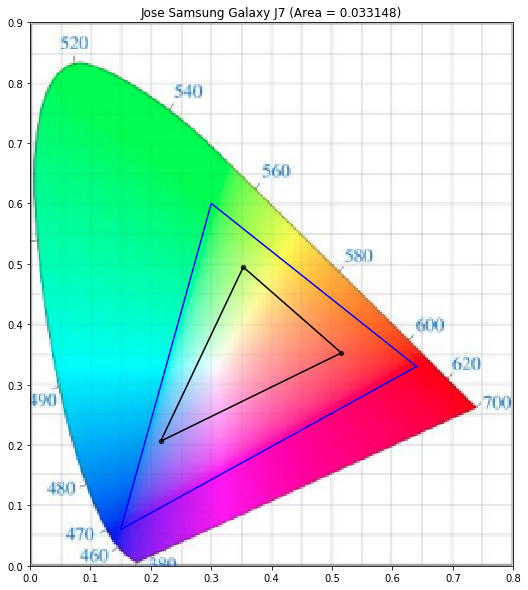

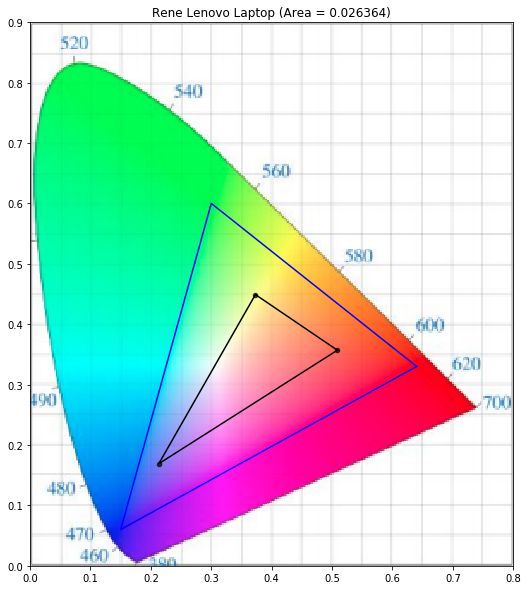

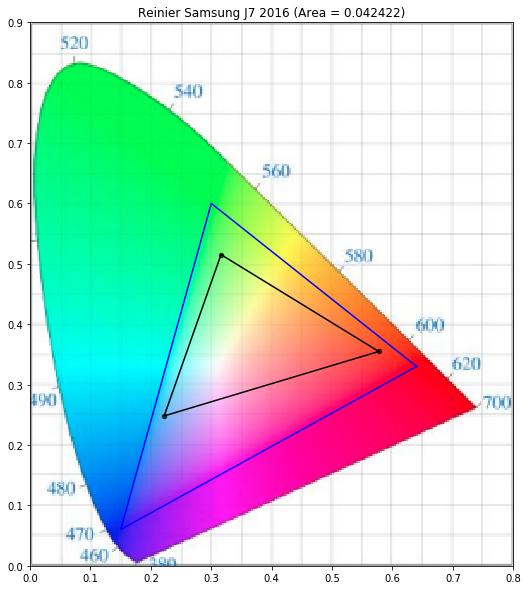

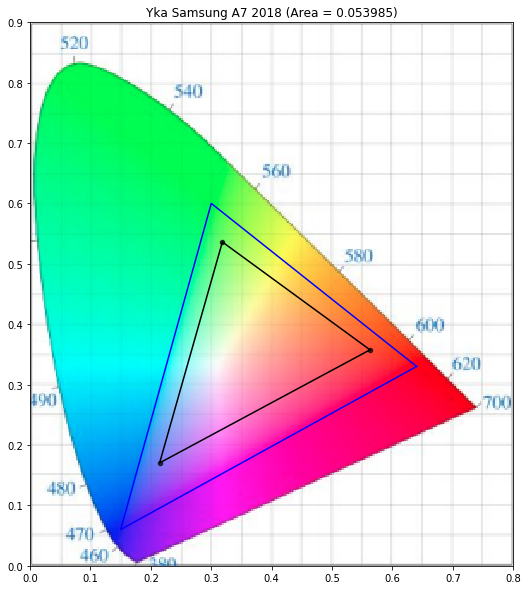

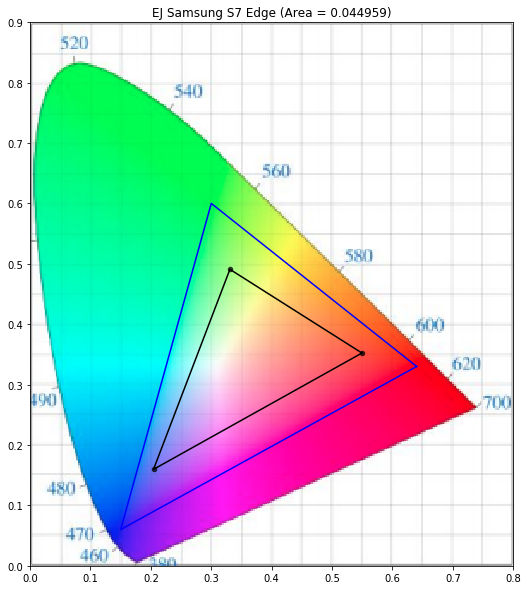

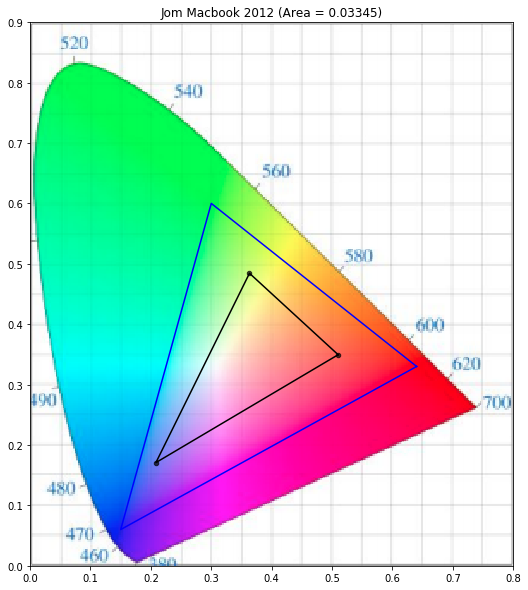

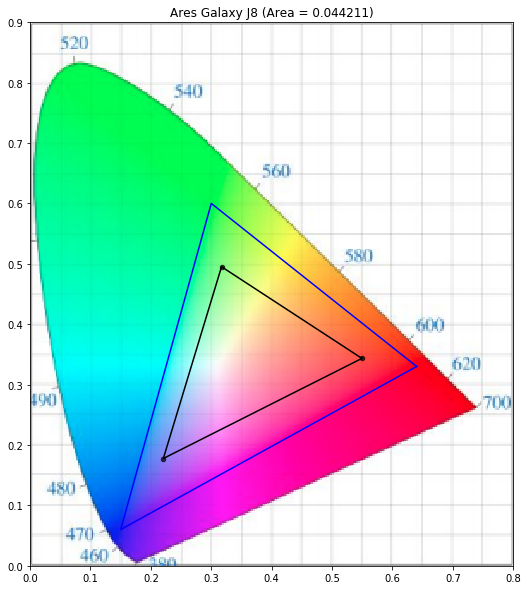

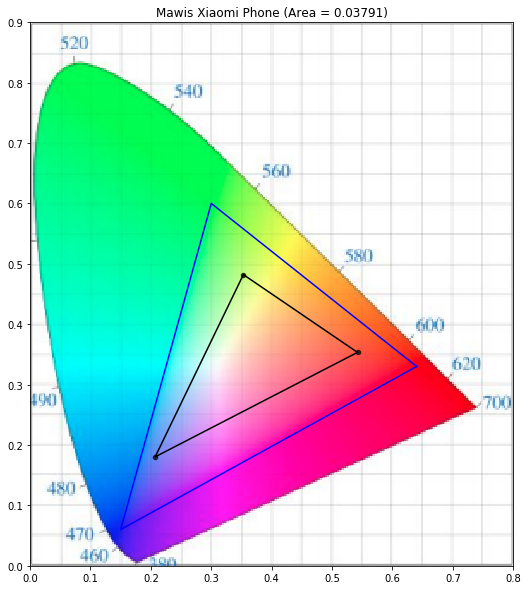

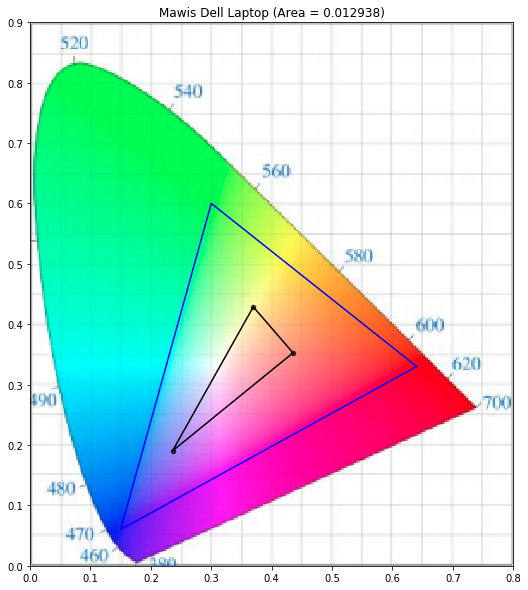

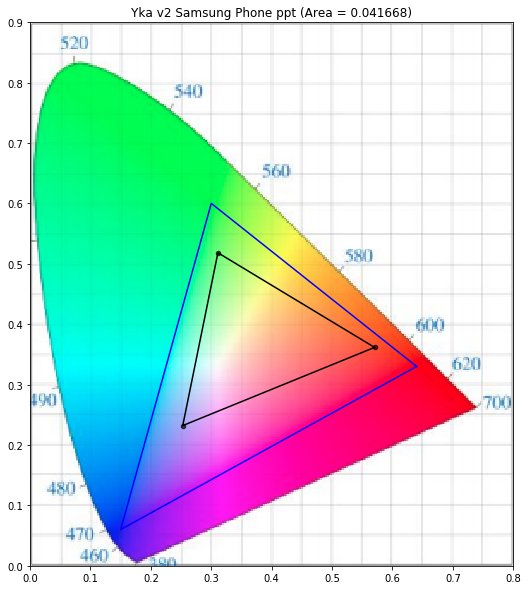

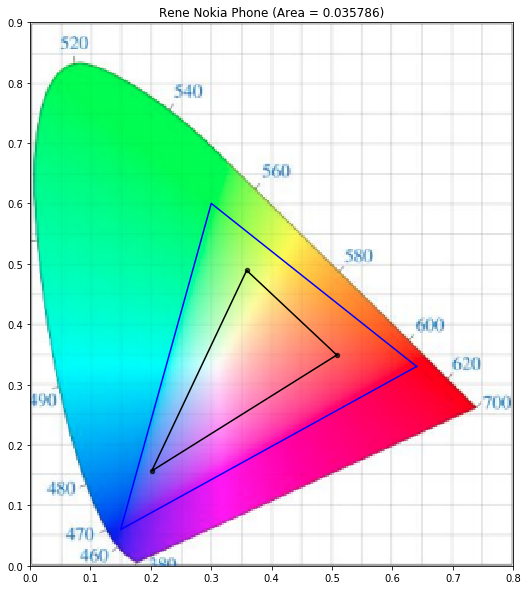

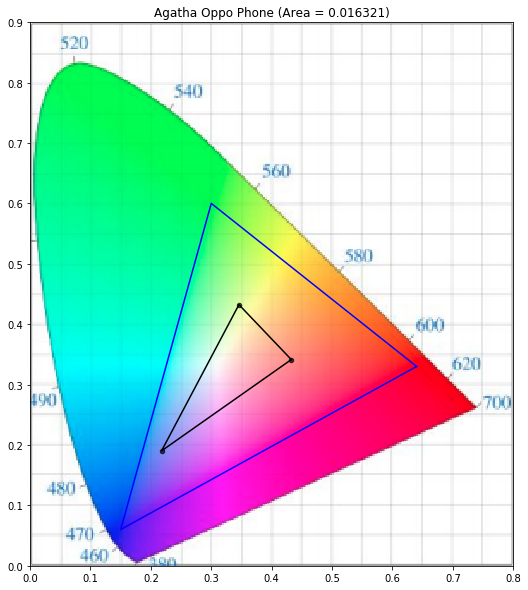

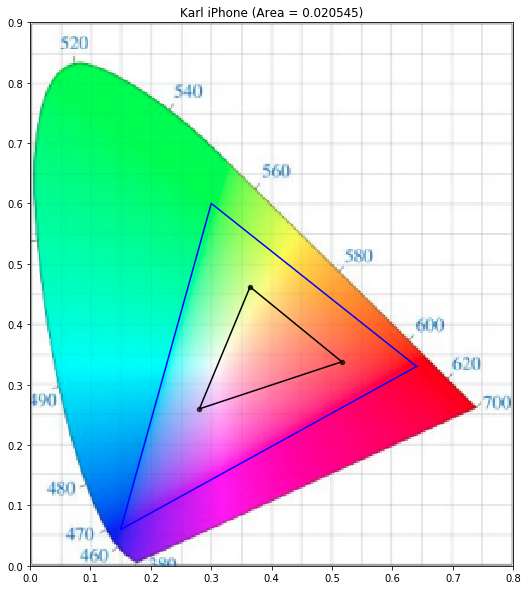

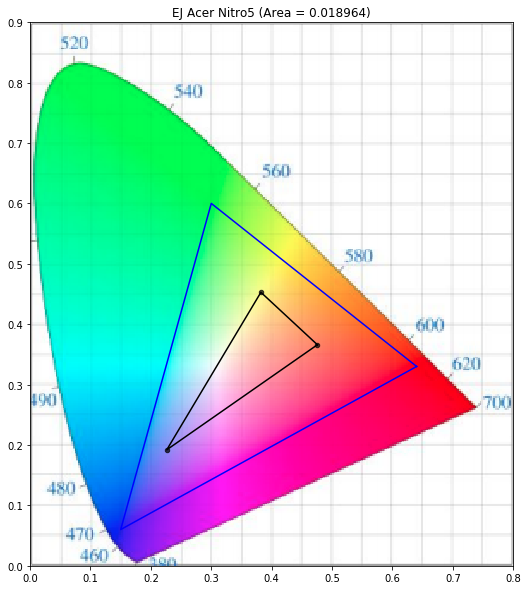

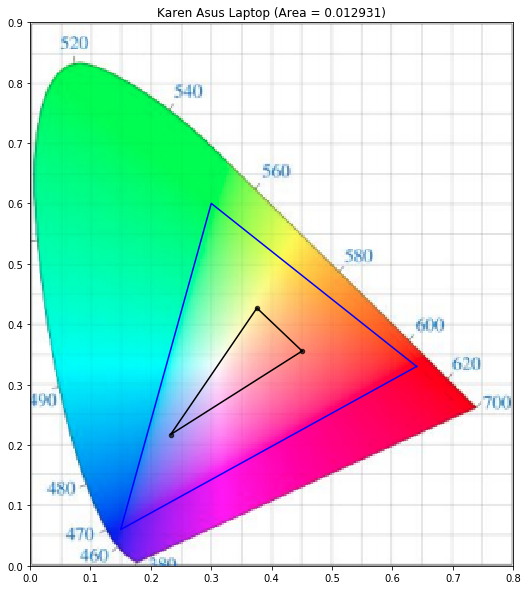

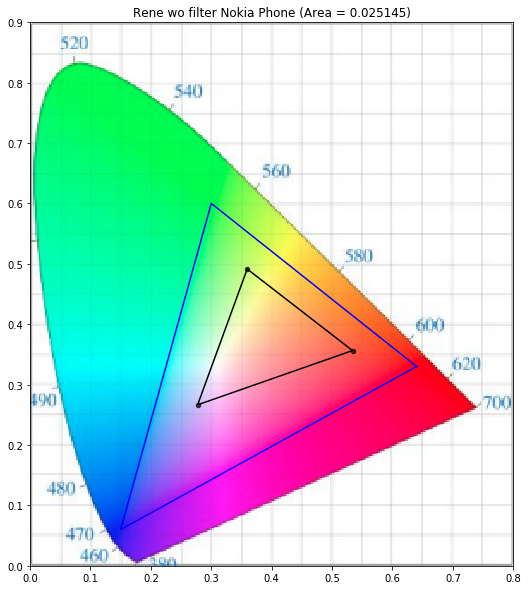

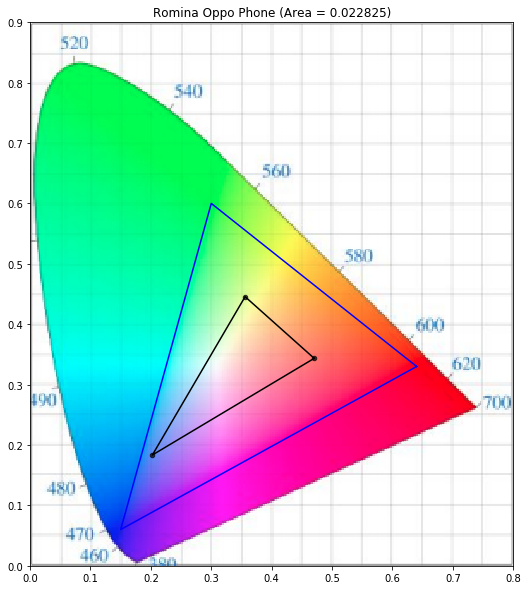

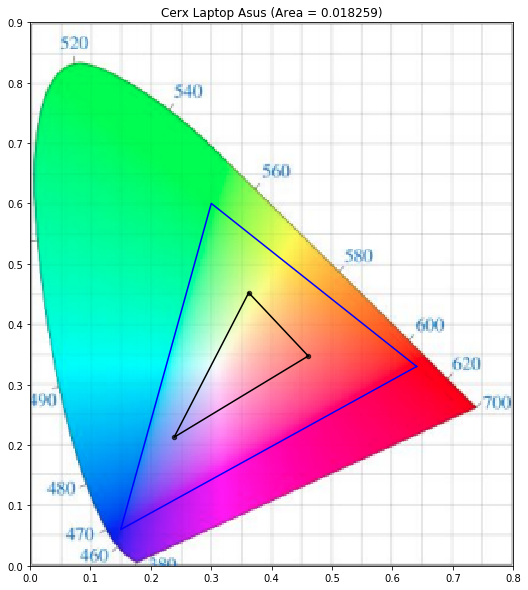

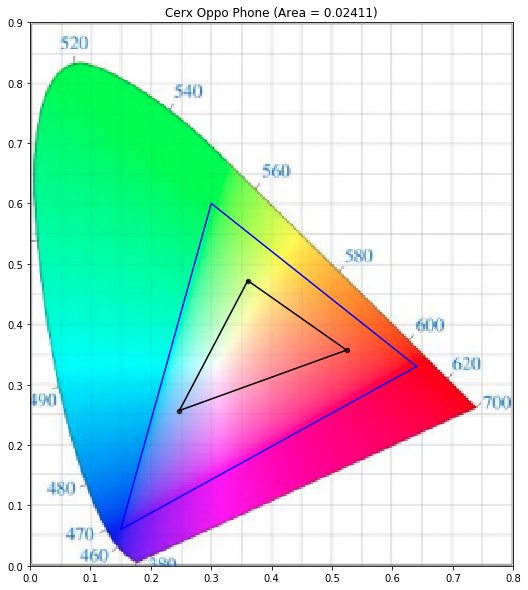

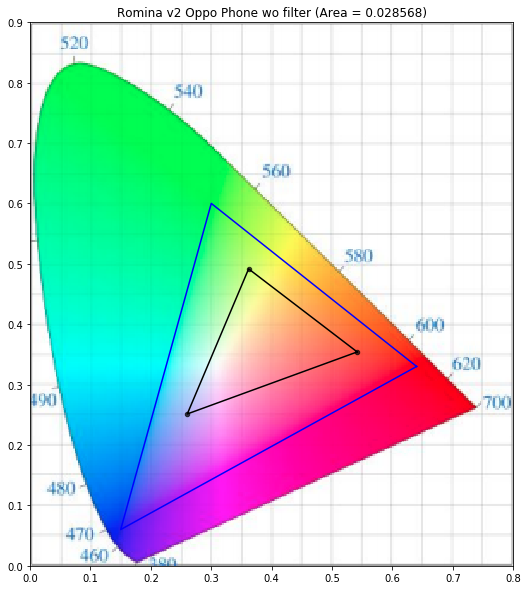

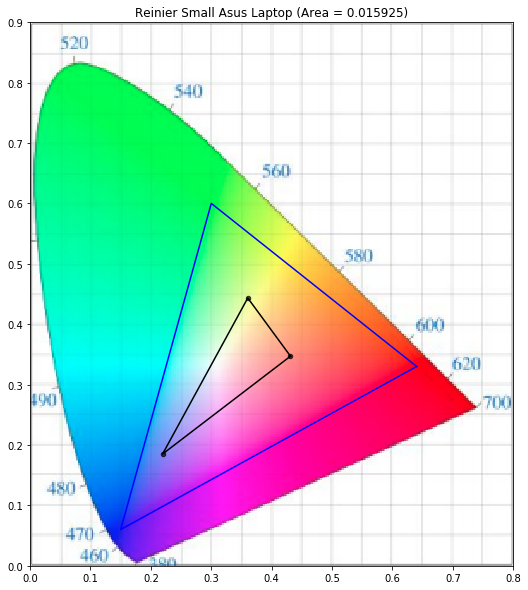

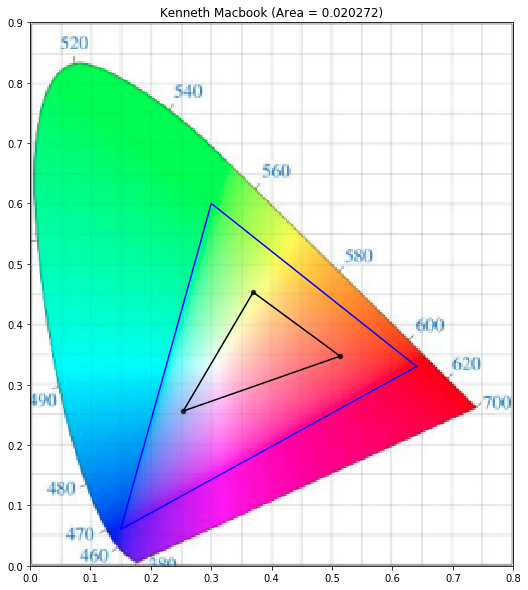

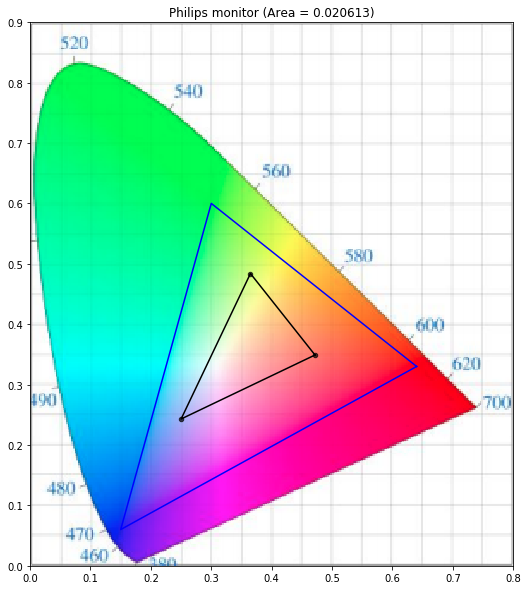

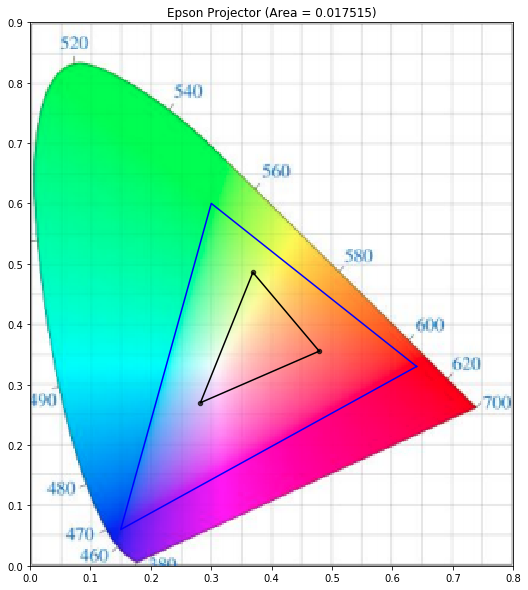

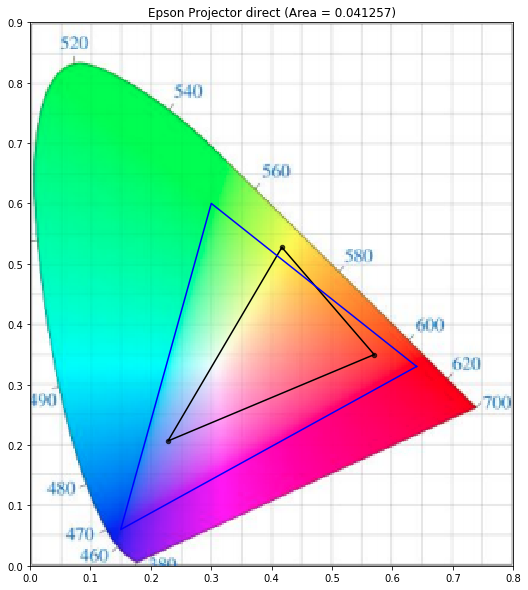

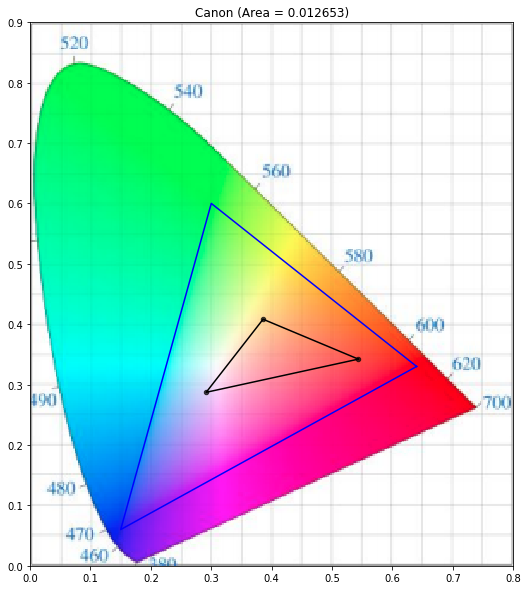

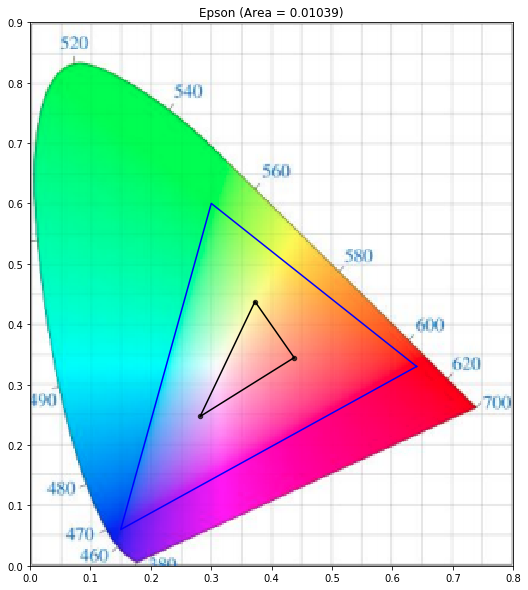

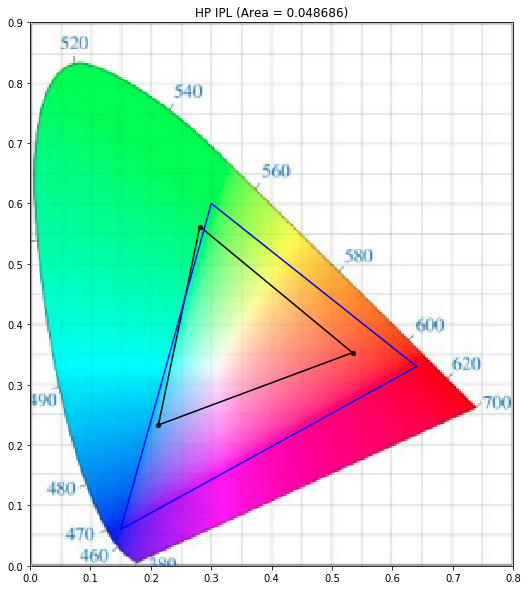

In [29]:
for i in range(29):
    plt.figure(figsize=[10,10])

    SRGB_x = [0.6400, 0.3000, 0.1500, 0.6400]
    SRGB_y = [0.3300, 0.6000, 0.0600, 0.3300]
    plt.scatter(data.loc[i]['x_red'], data.loc[i]['y_red'], s = 20, alpha = 0.7, color='black')
    plt.scatter(data.loc[i]['x_green'], data.loc[i]['y_green'], s = 20, alpha = 0.7, color='black')
    plt.scatter(data.loc[i]['x_blue'], data.loc[i]['y_blue'], s = 20, alpha = 0.7, color='black')
    
    x_list = [data.loc[i]['x_red'], data.loc[i]['x_green'], data.loc[i]['x_blue'],data.loc[i]['x_red']]
    y_list = [data.loc[i]['y_red'], data.loc[i]['y_green'], data.loc[i]['y_blue'],data.loc[i]['y_red']]
    plt.plot(x_list, y_list, color='black')
    
    plt.plot(SRGB_x, SRGB_y, color='blue')
    ciexy = plt.imread('color-tongue.png')
    plt.imshow(ciexy, extent=(0.0, 0.8, 0.0, 0.9))
    plt.title(data.loc[i]['Name'] + ' (Area = ' + str(data.loc[i]['area']) + ')')
    plt.xlim(0,0.8)
    plt.ylim(0,0.9)
    #plt.savefig('trials2/' + data.loc[i]['Name'] +'.png', bbox_inches='tight')
    plt.show()

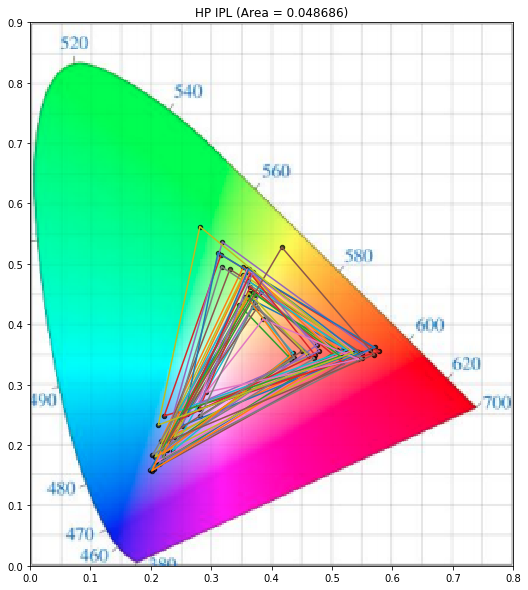

In [30]:
plt.figure(figsize=[10,10])
for i in range(29):

    plt.scatter(data.loc[i]['x_red'], data.loc[i]['y_red'], s = 20, alpha = 0.7, color='black')
    plt.scatter(data.loc[i]['x_green'], data.loc[i]['y_green'], s = 20, alpha = 0.7, color='black')
    plt.scatter(data.loc[i]['x_blue'], data.loc[i]['y_blue'], s = 20, alpha = 0.7, color='black')
    
    x_list = [data.loc[i]['x_red'], data.loc[i]['x_green'], data.loc[i]['x_blue'],data.loc[i]['x_red']]
    y_list = [data.loc[i]['y_red'], data.loc[i]['y_green'], data.loc[i]['y_blue'],data.loc[i]['y_red']]
    plt.plot(x_list, y_list)

    ciexy = plt.imread('color-tongue.png')
    plt.imshow(ciexy, extent=(0.0, 0.8, 0.0, 0.9))
    plt.title(data.loc[i]['Name'] + ' (Area = ' + str(data.loc[i]['area']) + ')')
    plt.xlim(0,0.8)
    plt.ylim(0,0.9)
    #plt.savefig('Images/' + data.loc[i]['Name'] +'.png', bbox_inches='tight')
plt.show()

### PCA Data Points

In [31]:
PCA_data = data

In [32]:
PCA_data = PCA_data.drop('Name', axis=1)

In [33]:
PCA_data2 = pd.DataFrame()
PCA_data2['area'] = data['area']

In [34]:
PCA_data.head()

x_red     y_red     z_red   x_green   y_green   z_green    x_blue  \
0  0.520133  0.361186  0.118681  0.359789  0.444557  0.195654  0.198143   
1  0.515426  0.352520  0.132054  0.352975  0.494671  0.152354  0.216232   
2  0.508770  0.356950  0.134279  0.373103  0.449069  0.177828  0.213123   
3  0.577331  0.354824  0.067845  0.316143  0.515216  0.168641  0.222053   
4  0.562790  0.357548  0.079662  0.318355  0.536142  0.145504  0.214464   

     y_blue    z_blue      area  
0  0.158465  0.643392  0.029675  
1  0.206229  0.577539  0.033148  
2  0.169034  0.617843  0.026364  
3  0.248160  0.529787  0.042422  
4  0.170336  0.615200  0.053985

In [35]:
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

cumulative_EV = []
dimensions = []

max_conponents = 4
for i in range(max_conponents):
    pca = PCA(n_components = i+1, svd_solver = 'full')
    y = pca.fit(PCA_data)
    explained_variance_ratio = y.explained_variance_ratio_
    print(explained_variance_ratio)
    cumulative_EV.append(sum(explained_variance_ratio)*100)
    dimensions.append(i+1)

[0.46929387]
[0.46929387 0.39426335]
[0.46929387 0.39426335 0.06721388]
[0.46929387 0.39426335 0.06721388 0.05812205]


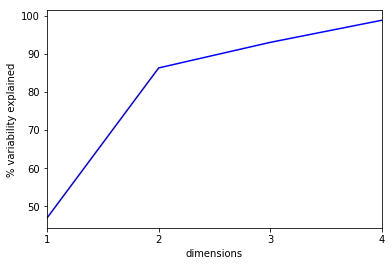

In [36]:
plt.plot(dimensions, cumulative_EV, "b-")
plt.xlabel('dimensions')
plt.ylabel("% variability explained")
plt.xlim(1,max_conponents)
plt.xticks(np.arange(max_conponents) + 1)
plt.show()

In [37]:
pca = PCA(n_components = 2, svd_solver = 'full')
y = pca.fit(PCA_data)
features = y.fit_transform(PCA_data)

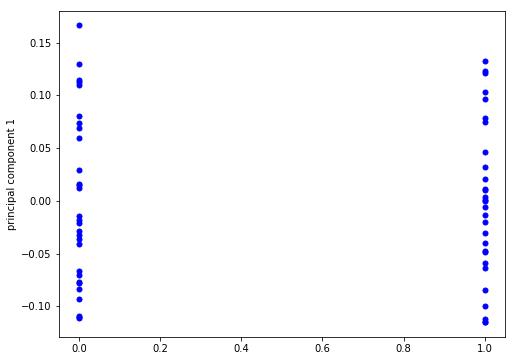

In [38]:
plt.figure(figsize = (8,6))
#plt.plot(features.T[0], features.T[1], "b.", ms = 10)
plt.plot(features.T, "b.", ms = 10)
plt.ylabel("principal component 1")
plt.show()

In [39]:
features.T

array([[-0.109341  , -0.03249182, -0.07649076,  0.01546753, -0.09341896,
        -0.11082815, -0.08375663, -0.07058352, -0.07750811, -0.01392118,
         0.02947416, -0.10999201, -0.03622457,  0.11416509, -0.02881564,
         0.0155939 ,  0.11293448, -0.06664088,  0.01246188,  0.06950991,
         0.07372214, -0.04081936,  0.08032418,  0.06004984,  0.1298512 ,
        -0.02094091,  0.1662834 ,  0.11011713, -0.01818133],
       [ 0.01134043, -0.02039133,  0.0203223 , -0.11474418, -0.0996407 ,
        -0.04791497,  0.00075677, -0.04802088, -0.03973343,  0.12076882,
        -0.1118897 ,  0.00405024,  0.13289148, -0.00548061,  0.04626186,
         0.09679259, -0.05901767,  0.07812506,  0.0744137 , -0.03070215,
        -0.06341242,  0.12287637,  0.00022084,  0.0318032 ,  0.01021131,
        -0.11483479, -0.01349147,  0.10334886, -0.08490954]])

In [40]:
pca_points = pd.DataFrame.from_records(features, columns = ["principal component 1", "principal component 2"])

In [41]:
pca_points['label'] = data['Name']
#red - iphone
#blue - samsung
#green - mac
#yellow - laptop
#violet - other phones
#black - monitor, projector
#orange - printed
pca_points['color'] = ['red', 'blue', 'yellow', 'blue', 'blue', 'blue', 'green', 'blue', 'violet', 
                       'yellow', 'blue', 'violet', 'violet', 'red', 'yellow', 'yellow', 'violet', 
                       'violet', 'yellow', 'violet', 'violet', 'yellow', 'green', 'gray', 'black', 'black', 
                       'orange', 'orange', 'orange']

In [42]:
pca_points.head()

principal component 1  principal component 2                    label  \
0              -0.109341               0.011340          Samantha iPhone   
1              -0.032492              -0.020391   Jose Samsung Galaxy J7   
2              -0.076491               0.020322       Rene Lenovo Laptop   
3               0.015468              -0.114744  Reinier Samsung J7 2016   
4              -0.093419              -0.099641      Yka Samsung A7 2018   

    color  
0     red  
1    blue  
2  yellow  
3    blue  
4    blue

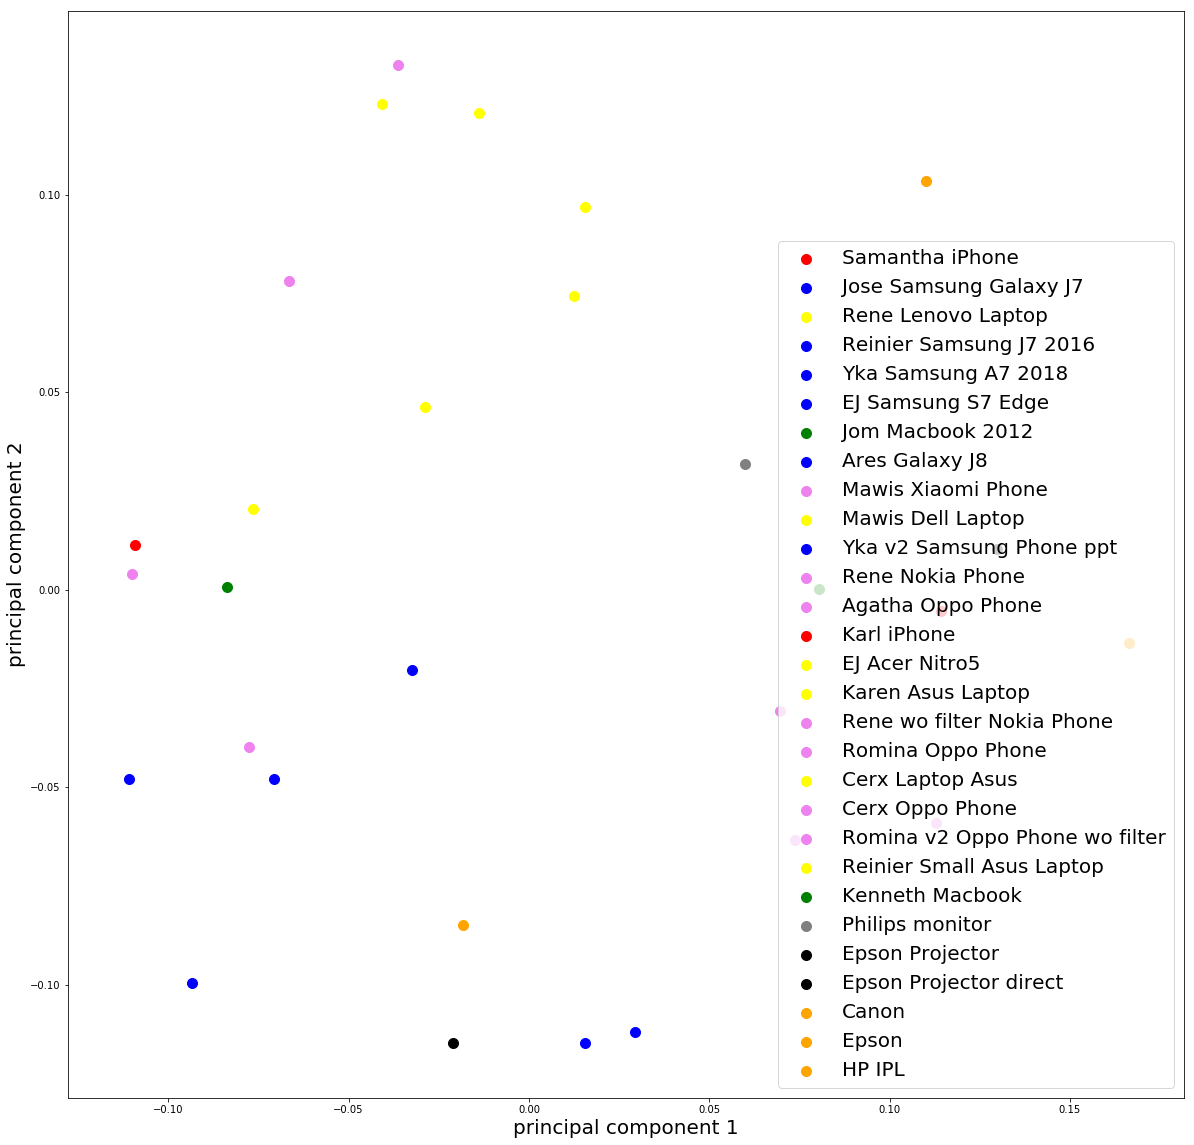

In [43]:
plt.figure(figsize=(20,20))
for i in range(len(pca_points)):
    #plt.scatter(0,
    plt.scatter(pca_points.iloc[i]['principal component 1'], 
                pca_points.iloc[i]['principal component 2'], 
                label=pca_points.iloc[i]['label'] ,
                color = pca_points.iloc[i]['color'], 
                s = 100)

plt.xlabel('principal component 1', fontsize=20)
plt.ylabel('principal component 2', fontsize=20)
plt.legend(fontsize=20)
plt.show()